About this project: 

We are interested in learning about what exactly affects an undergraduate student’s likelihood to complete college. Particularly, we are observing the average amount of student aid, sat score, students retained for a second year, estimated educational spending, type of institution attended, gender, and race, to discover whether or not these variables have a significant impact on graduation rates. The goal is to use our data analysis skills to determine the extent that these factors affect the percentage of students who graduate within 100% of normal time for that specific institution.

Use a machine learning model, including a confusion matrix and accuracy score. Use Linear Regression, and test the training data against the x variables.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing libraries
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
#from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

plt.figure().set_figwidth(50)

<Figure size 5000x480 with 0 Axes>

In [3]:
data_1 = pd.read_csv("cc_institution_details.csv")

data_1.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [4]:
data_1.columns

Index(['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control',
       'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
       'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
       'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value',
       'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile',
       'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
       'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
       'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
       'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first',
       'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first',
       'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first',
       'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first',
  

In [7]:
# Exclude some columns that won't be needed

data_1 = data_1[[
        'index', 
        'level', 
        'control',
        'student_count',
        'awards_per_value', 
        'awards_per_state_value', 
        'awards_per_natl_value',
        'exp_award_value', 
        'exp_award_state_value', 
        'exp_award_natl_value',
        'exp_award_percentile',  
        'aid_value', 
        'aid_percentile',
        'med_sat_value',
        'grad_100_value',
        'grad_100_percentile', 
        'grad_150_value', 
        'grad_150_percentile',
        'pell_value', 
        'pell_percentile', 
        'retain_value', 
        'retain_percentile',
        'cohort_size']]

In [8]:
data_1.head()

,index,level,control,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,exp_award_state_value,exp_award_natl_value,...,med_sat_value,grad_100_value,grad_100_percentile,grad_150_value,grad_150_percentile,pell_value,pell_percentile,retain_value,retain_percentile,cohort_size
0,0,4-year,Public,4051,14.2,18.8,21.5,105331,75743,66436,...,823.0,10.0,15.0,29.1,14.0,71.2,98.0,63.1,17.0,882.0
1,1,4-year,Public,11502,20.9,18.8,21.5,136546,75743,66436,...,1146.0,29.4,67.0,53.5,66.0,35.1,39.0,80.2,70.0,1376.0
2,2,4-year,Private not-for-profit,322,29.9,17.8,22.5,58414,92268,101725,...,NaN,0.0,0.0,66.7,72.0,68.4,91.0,37.5,2.0,3.0
3,3,4-year,Public,5696,20.9,18.8,21.5,64418,75743,66436,...,1180.0,16.5,34.0,48.4,54.0,32.8,32.0,81.0,72.0,759.0
4,4,4-year,Public,5356,11.6,18.8,21.5,132407,75743,66436,...,830.0,8.8,11.0,25.2,9.0,82.7,100.0,62.2,15.0,1351.0


In [9]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   3798 non-null   int64  
 1   level                   3798 non-null   object 
 2   control                 3798 non-null   object 
 3   student_count           3798 non-null   int64  
 4   awards_per_value        3798 non-null   float64
 5   awards_per_state_value  3798 non-null   float64
 6   awards_per_natl_value   3798 non-null   float64
 7   exp_award_value         3798 non-null   int64  
 8   exp_award_state_value   3798 non-null   int64  
 9   exp_award_natl_value    3798 non-null   int64  
 10  exp_award_percentile    3798 non-null   int64  
 11  aid_value               3797 non-null   float64
 12  aid_percentile          3797 non-null   float64
 13  med_sat_value           1337 non-null   float64
 14  grad_100_value          3467 non-null   

In [11]:
#Getting the total number of nan values
data_1.isnull().sum(axis = 0)
# data_1.info()

index                        0
level                        0
control                      0
student_count                0
awards_per_value             0
awards_per_state_value       0
awards_per_natl_value        0
exp_award_value              0
exp_award_state_value        0
exp_award_natl_value         0
exp_award_percentile         0
aid_value                    1
aid_percentile               1
med_sat_value             2461
grad_100_value             331
grad_100_percentile        331
grad_150_value             331
grad_150_percentile        331
pell_value                   1
pell_percentile              1
retain_value               263
retain_percentile          263
cohort_size                331
dtype: int64

In [12]:
data_1.head()

,index,level,control,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,exp_award_state_value,exp_award_natl_value,...,med_sat_value,grad_100_value,grad_100_percentile,grad_150_value,grad_150_percentile,pell_value,pell_percentile,retain_value,retain_percentile,cohort_size
0,0,4-year,Public,4051,14.2,18.8,21.5,105331,75743,66436,...,823.0,10.0,15.0,29.1,14.0,71.2,98.0,63.1,17.0,882.0
1,1,4-year,Public,11502,20.9,18.8,21.5,136546,75743,66436,...,1146.0,29.4,67.0,53.5,66.0,35.1,39.0,80.2,70.0,1376.0
2,2,4-year,Private not-for-profit,322,29.9,17.8,22.5,58414,92268,101725,...,NaN,0.0,0.0,66.7,72.0,68.4,91.0,37.5,2.0,3.0
3,3,4-year,Public,5696,20.9,18.8,21.5,64418,75743,66436,...,1180.0,16.5,34.0,48.4,54.0,32.8,32.0,81.0,72.0,759.0
4,4,4-year,Public,5356,11.6,18.8,21.5,132407,75743,66436,...,830.0,8.8,11.0,25.2,9.0,82.7,100.0,62.2,15.0,1351.0


In [13]:
# Determine the number of unique values in each column.
data_1.nunique()

index                     3798
level                        2
control                      3
student_count             2829
awards_per_value           517
awards_per_state_value     160
awards_per_natl_value        6
exp_award_value           3611
exp_award_state_value      264
exp_award_natl_value         6
exp_award_percentile       101
aid_value                 3135
aid_percentile             101
med_sat_value              472
grad_100_value             806
grad_100_percentile        101
grad_150_value             862
grad_150_percentile        101
pell_value                 832
pell_percentile            101
retain_value               649
retain_percentile          101
cohort_size               1409
dtype: int64

In [14]:
# student_count = Total number of undergraduates in 2010
# cohort_size = 
# still working through this variable-- may just use student count
data_1[['student_count', 'cohort_size']]  ## what is the difference between these 2 columns? 

,student_count,cohort_size
0,4051,882.0
1,11502,1376.0
2,322,3.0
3,5696,759.0
4,5356,1351.0
...,...,...
3793,110,12.0
3794,140,33.0
3795,488,8.0
3796,147,145.0


In [15]:
data_1.level.unique()

array(['4-year', '2-year'], dtype=object)

In [16]:
data_1.control.unique()

array(['Public', 'Private not-for-profit', 'Private for-profit'],
      dtype=object)

In [17]:
# percentage of missing values
(data_1.isnull().sum() / data_1.shape[0])*100

index                      0.000000
level                      0.000000
control                    0.000000
student_count              0.000000
awards_per_value           0.000000
awards_per_state_value     0.000000
awards_per_natl_value      0.000000
exp_award_value            0.000000
exp_award_state_value      0.000000
exp_award_natl_value       0.000000
exp_award_percentile       0.000000
aid_value                  0.026330
aid_percentile             0.026330
med_sat_value             64.797262
grad_100_value             8.715113
grad_100_percentile        8.715113
grad_150_value             8.715113
grad_150_percentile        8.715113
pell_value                 0.026330
pell_percentile            0.026330
retain_value               6.924697
retain_percentile          6.924697
cohort_size                8.715113
dtype: float64

In [18]:
data_1.shape

(3798, 23)

In [19]:
# Creating dummy variables for the categorical variables
# dont do drop_first = True here 
# for control we have 3 different types so it drops the first one
# drop_first = True is good for things that are one or the other like yes/no, male/female, pass/fail 
# we could use it for the 2-year / 4-year if you wanted but i think it is okay to keep for now 
train_features = data_1
train_features = pd.get_dummies(train_features, drop_first = False)

train_features.head()

,index,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,exp_award_state_value,exp_award_natl_value,exp_award_percentile,aid_value,...,pell_value,pell_percentile,retain_value,retain_percentile,cohort_size,level_2-year,level_4-year,control_Private for-profit,control_Private not-for-profit,control_Public
0,0,4051,14.2,18.8,21.5,105331,75743,66436,90,7142.0,...,71.2,98.0,63.1,17.0,882.0,0,1,0,0,1
1,1,11502,20.9,18.8,21.5,136546,75743,66436,97,6088.0,...,35.1,39.0,80.2,70.0,1376.0,0,1,0,0,1
2,2,322,29.9,17.8,22.5,58414,92268,101725,30,2540.0,...,68.4,91.0,37.5,2.0,3.0,0,1,0,1,0
3,3,5696,20.9,18.8,21.5,64418,75743,66436,61,6647.0,...,32.8,32.0,81.0,72.0,759.0,0,1,0,0,1
4,4,5356,11.6,18.8,21.5,132407,75743,66436,96,7256.0,...,82.7,100.0,62.2,15.0,1351.0,0,1,0,0,1


In [20]:
data_1.dtypes

index                       int64
level                      object
control                    object
student_count               int64
awards_per_value          float64
awards_per_state_value    float64
awards_per_natl_value     float64
exp_award_value             int64
exp_award_state_value       int64
exp_award_natl_value        int64
exp_award_percentile        int64
aid_value                 float64
aid_percentile            float64
med_sat_value             float64
grad_100_value            float64
grad_100_percentile       float64
grad_150_value            float64
grad_150_percentile       float64
pell_value                float64
pell_percentile           float64
retain_value              float64
retain_percentile         float64
cohort_size               float64
dtype: object

In [ ]:
## read more about the minmaxscaler here: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [21]:
# Creating an instance of the MinMaxScaler
scaler = MinMaxScaler()

# Applying fit_transform on the training features data
train_features_scaled = scaler.fit_transform(train_features)

# The above scaler returns the data in array format, below we are converting it back to pandas DataFrame
train_features_scaled = pd.DataFrame(train_features_scaled, index = train_features.index, columns = train_features.columns)

train_features_scaled.head()

,index,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,exp_award_state_value,exp_award_natl_value,exp_award_percentile,aid_value,...,pell_value,pell_percentile,retain_value,retain_percentile,cohort_size,level_2-year,level_4-year,control_Private for-profit,control_Private not-for-profit,control_Public
0,0.000000,0.023677,0.099927,0.275132,0.306748,0.019941,0.359141,0.541284,0.90,0.165867,...,0.712,0.98,0.631,0.17,0.054289,0.0,1.0,0.0,0.0,1.0
1,0.000263,0.067476,0.148796,0.275132,0.306748,0.025851,0.359141,0.541284,0.97,0.140338,...,0.351,0.39,0.802,0.70,0.084730,0.0,1.0,0.0,0.0,1.0
2,0.000527,0.001758,0.214442,0.257496,0.368098,0.011059,0.452754,1.000000,0.30,0.054401,...,0.684,0.91,0.375,0.02,0.000123,0.0,1.0,0.0,1.0,0.0
3,0.000790,0.033347,0.148796,0.275132,0.306748,0.012196,0.359141,0.541284,0.61,0.153878,...,0.328,0.32,0.810,0.72,0.046709,0.0,1.0,0.0,0.0,1.0
4,0.001053,0.031348,0.080963,0.275132,0.306748,0.025067,0.359141,0.541284,0.96,0.168629,...,0.827,1.00,0.622,0.15,0.083190,0.0,1.0,0.0,0.0,1.0


In [22]:
data_1.dtypes

index                       int64
level                      object
control                    object
student_count               int64
awards_per_value          float64
awards_per_state_value    float64
awards_per_natl_value     float64
exp_award_value             int64
exp_award_state_value       int64
exp_award_natl_value        int64
exp_award_percentile        int64
aid_value                 float64
aid_percentile            float64
med_sat_value             float64
grad_100_value            float64
grad_100_percentile       float64
grad_150_value            float64
grad_150_percentile       float64
pell_value                float64
pell_percentile           float64
retain_value              float64
retain_percentile         float64
cohort_size               float64
dtype: object

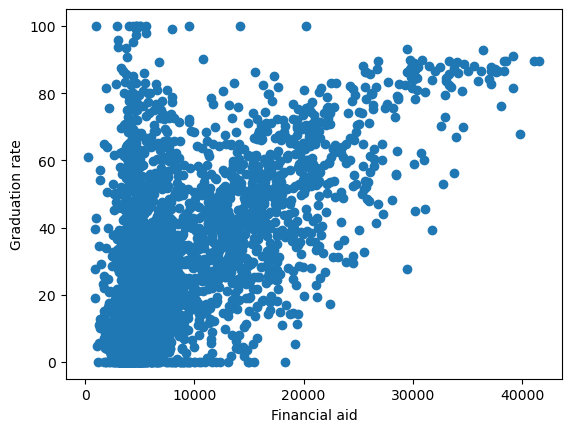

In [24]:
plt.scatter(data_1.aid_value, data_1.grad_100_value)
plt.xlabel('Financial aid')
plt.ylabel('Graduation rate')
plt.show()

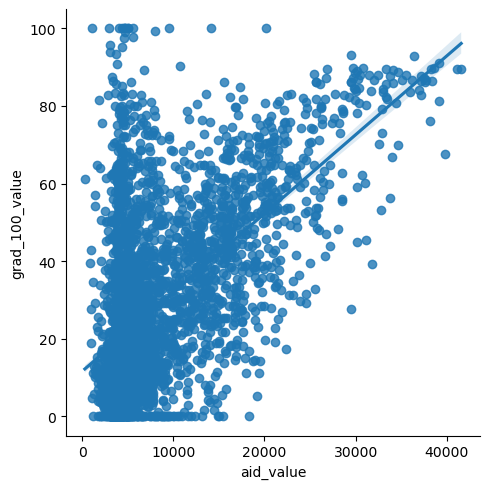

In [25]:
import seaborn as sns
sns.lmplot(x = 'aid_value', y = 'grad_100_value', data = data_1)

# See if other input variables are linear to our output variables

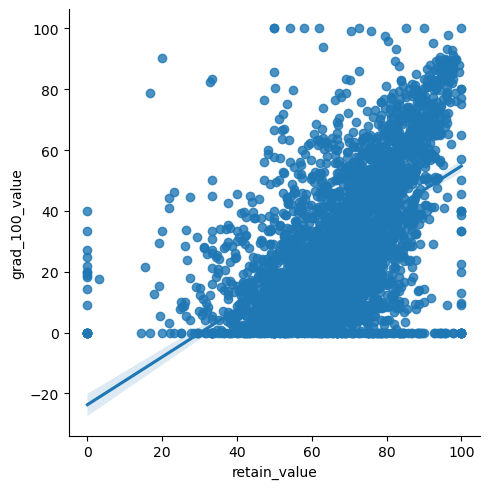

In [27]:
import seaborn as sns
sns.lmplot(x = 'retain_value', y = 'grad_100_value', data = data_1)

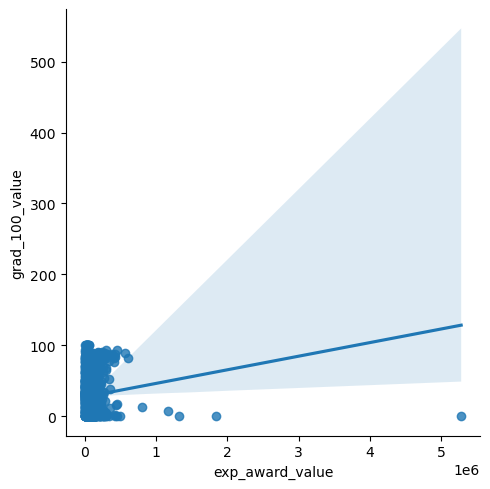

In [50]:
import seaborn as sns
sns.lmplot(x = 'exp_award_value', y = 'grad_100_value', data = data_1)

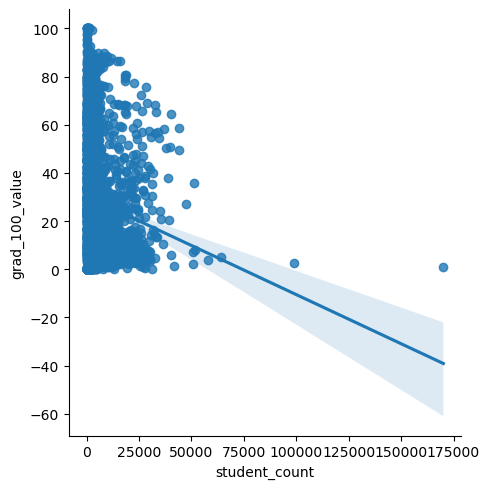

In [28]:
import seaborn as sns
sns.lmplot(x = 'student_count', y = 'grad_100_value', data = data_1)

In [ ]:
# convert "Control" string to float, otherwise will give error
#import seaborn as sns
#sns.lmplot(x = 'control', y = 'grad_100_value', data = data_1)

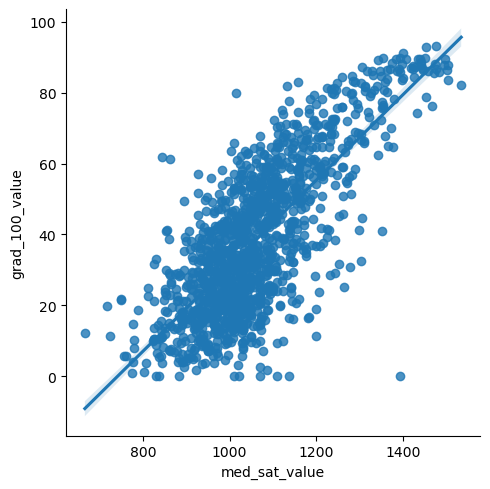

In [29]:
import seaborn as sns
sns.lmplot(x = 'med_sat_value', y = 'grad_100_value', data = data_1)

## Linear Regression Model 

In [30]:
train_features_scaled = train_features_scaled.dropna()

In [31]:
train_features_scaled = train_features_scaled.drop(columns = ['index'])
train_features_scaled.columns

print(train_features_scaled.isna().sum().sum())


0


In [32]:
# scale data
train_features_scaled.head()
x_values = train_features_scaled.drop(columns = ['grad_100_value'])
y_value = train_features_scaled.grad_100_value

In [33]:
y_value

0       0.100
1       0.294
3       0.165
4       0.088
5       0.427
        ...  
3572    0.547
3639    0.220
3651    0.000
3717    0.568
3794    0.515
Name: grad_100_value, Length: 1319, dtype: float64

In [36]:
# we need to split the data into a training set and a testing set to see how well this model preforms 
# use train_test_split

In [37]:
train_x, test_x, train_y, test_y = train_test_split(x_values, y_value)

In [38]:
train_x

,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,exp_award_state_value,exp_award_natl_value,exp_award_percentile,aid_value,aid_percentile,...,pell_value,pell_percentile,retain_value,retain_percentile,cohort_size,level_2-year,level_4-year,control_Private for-profit,control_Private not-for-profit,control_Public
1969,0.001023,0.169949,0.320988,0.368098,0.007314,0.770853,1.000000,0.10,0.170009,0.18,...,0.394,0.56,0.581,0.13,0.002403,0.0,1.0,0.0,1.0,0.0
105,0.003345,0.132020,0.285714,0.368098,0.024173,0.397470,1.000000,0.82,0.392191,0.65,...,0.462,0.69,0.698,0.34,0.008750,0.0,1.0,0.0,1.0,0.0
2247,0.008065,0.162655,0.343915,0.368098,0.035414,0.376878,1.000000,0.93,0.831371,0.98,...,0.172,0.09,0.941,0.93,0.020705,0.0,1.0,0.0,1.0,0.0
2537,0.002833,0.305616,0.312169,0.368098,0.010118,0.535145,1.000000,0.24,0.093979,0.05,...,0.390,0.54,0.875,0.82,0.000493,0.0,1.0,0.0,1.0,0.0
2444,0.003221,0.116703,0.335097,0.368098,0.035762,0.555488,1.000000,0.93,0.343288,0.54,...,0.377,0.51,0.533,0.09,0.004991,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2724,0.258927,0.172867,0.326279,0.306748,0.014413,0.237985,0.541284,0.75,0.197307,0.85,...,0.216,0.07,0.914,0.94,0.494454,0.0,1.0,0.0,0.0,1.0
553,0.066758,0.162655,0.370370,0.368098,0.034092,0.337535,1.000000,0.92,0.600809,0.90,...,0.185,0.11,0.913,0.89,0.121765,0.0,1.0,0.0,1.0,0.0
1959,0.086585,0.147338,0.315697,0.306748,0.011289,0.351839,0.541284,0.53,0.165359,0.72,...,0.443,0.70,0.739,0.50,0.149741,0.0,1.0,0.0,0.0,1.0
2913,0.174776,0.188184,0.363316,0.306748,0.026167,0.298951,0.541284,0.97,0.318437,0.97,...,0.249,0.14,0.930,0.97,0.318092,0.0,1.0,0.0,0.0,1.0


In [39]:
x_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1319 entries, 0 to 3794
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   student_count                   1319 non-null   float64
 1   awards_per_value                1319 non-null   float64
 2   awards_per_state_value          1319 non-null   float64
 3   awards_per_natl_value           1319 non-null   float64
 4   exp_award_value                 1319 non-null   float64
 5   exp_award_state_value           1319 non-null   float64
 6   exp_award_natl_value            1319 non-null   float64
 7   exp_award_percentile            1319 non-null   float64
 8   aid_value                       1319 non-null   float64
 9   aid_percentile                  1319 non-null   float64
 10  med_sat_value                   1319 non-null   float64
 11  grad_100_percentile             1319 non-null   float64
 12  grad_150_value                  13

In [40]:
# fit your linear regression model
regression = LinearRegression()
regression.fit(train_x, train_y)
regression.score(train_x, train_y)

0.9773463464540953

In [43]:
# Now we have cleaned the data and successfully fitted the data in our Model
# Now predicting the test data

y_test_pred = regression.predict(test_x)

import sklearn.metrics as sm


print("Mean absolute error =", round(sm.mean_absolute_error(test_y, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(test_y, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(test_y, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(test_y, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(test_y, y_test_pred), 2))

print("Score of Our Linear Regression Model is : ",regression.score(x_values,y_value)*100)

print("\n\nDescription: \n\nNow our data is working accuratly and giving 97 percent accurate result and \n\nModel Accuracy which is measured by R2 score is also approx 97 percent which is best ")

Mean absolute error = 0.02
Mean squared error = 0.0
Median absolute error = 0.02
Explain variance score = 0.97
R2 score = 0.97
Score of Our Linear Regression Model is :  97.67520462295013


Description: 

Now our data is working accuratly and giving 97 percent accurate result and 

Model Accuracy which is measured by R2 score is also approx 97 percent which is best 
